In [1]:
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
def plot_with_labels(low_dims, labels, file_name):
    assert low_dims.shape[0] >= len(labels), 'More labels than embeddings'

    plt.figure(figsize=(25, 25))
    for i, label in enumerate(labels):
        x, y = low_dims[i, :]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.savefig(file_name)

In [17]:
def main():
    model_dir = './models'
    model_name = 'word2vec_pt'
    model_path = os.path.join(model_dir, '%s.model' % model_name)
    final_embeddings, dictionary, reverse_dictionary = pickle.load(open(model_path, 'rb'))

    try:
        tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
        plot_only = 200
        low_dims = tsne.fit_transform(final_embeddings[:plot_only, :])
        labels = [reverse_dictionary[i] for i in range(plot_only)]
        plot_with_labels(low_dims, labels, os.path.join('./plot', '%s.png' % model_name))

    except ImportError as ex:
        print('Please install sklearn, matplotlib, and scipy to show embeddings.')
        print(ex)

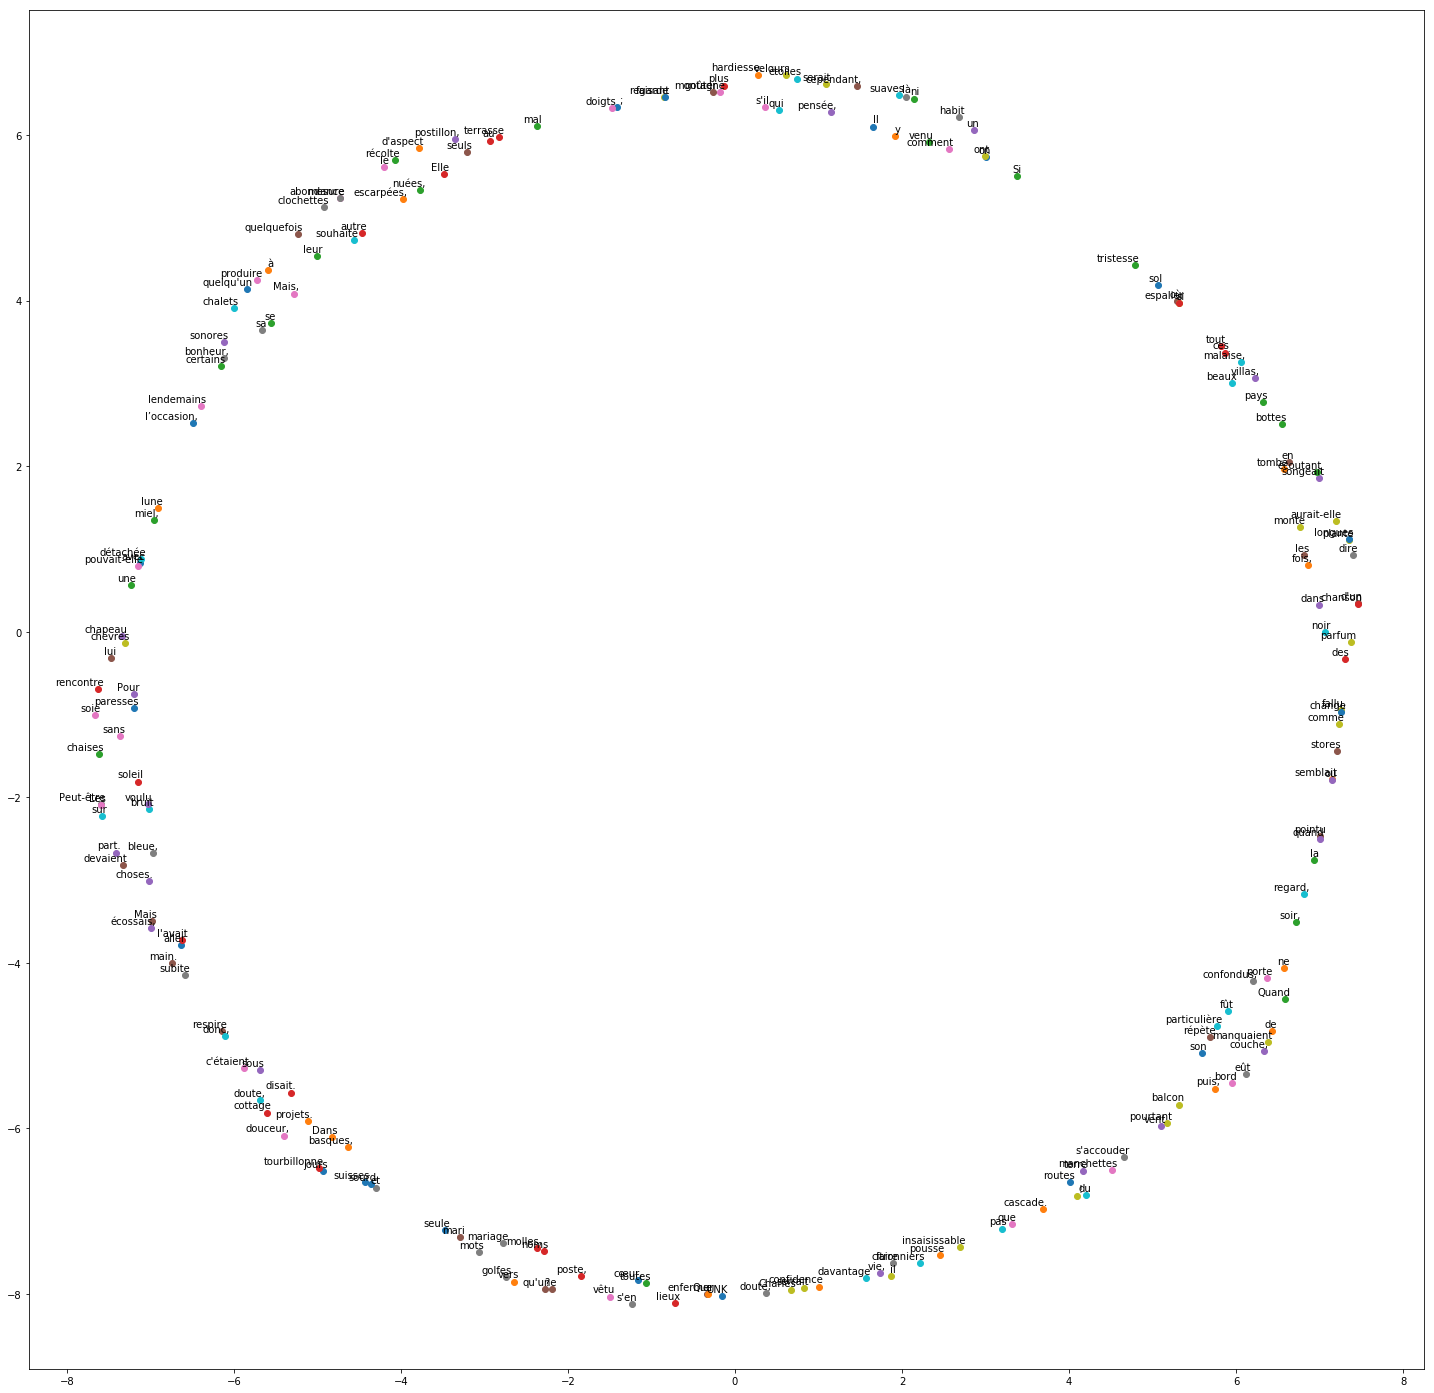

In [18]:
if __name__ == '__main__':
    main()